# Rad Lab

СБМ20 (SBM20) Geiger-Müller tube simulations

© 2025 by Gissio

## Settings

In [8]:
detector_geometry = "data/geometry.toml"
detector_label = "СБМ20 (SBM20)"
N_montecarlo = 10000000

## Detector geometry

![J305 Geometry](data/geometry.png)

## Simulations

In [9]:
import sys
if '../../tools' not in sys.path:
    sys.path.append('../../tools')

import radlab

# %matplotlib widget

source_area = radlab.get_source_area(detector_geometry)
energies, efficiencies = radlab.simulate_gm_energies(
    detector_geometry, N_montecarlo)
angles, angular_response = radlab.simulate_gm_angles(
    detector_geometry, N_montecarlo)

## Detector efficiency

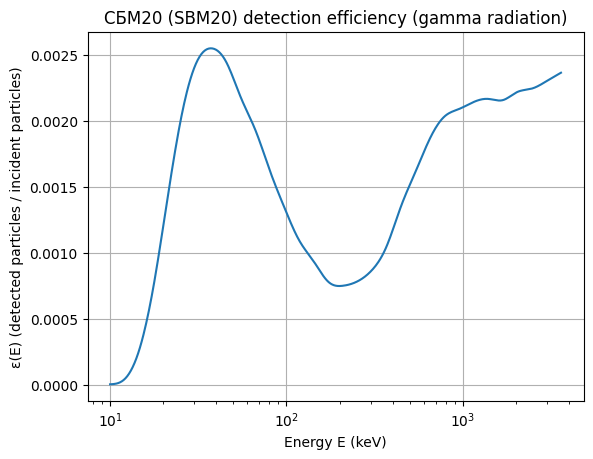

In [10]:
radlab.plot_semilogx(f'{detector_label} detection efficiency (gamma radiation)',
                     energies, efficiencies, "ε(E) (detected particles / incident particles)")

## Absorbed dose (air) sensitivity

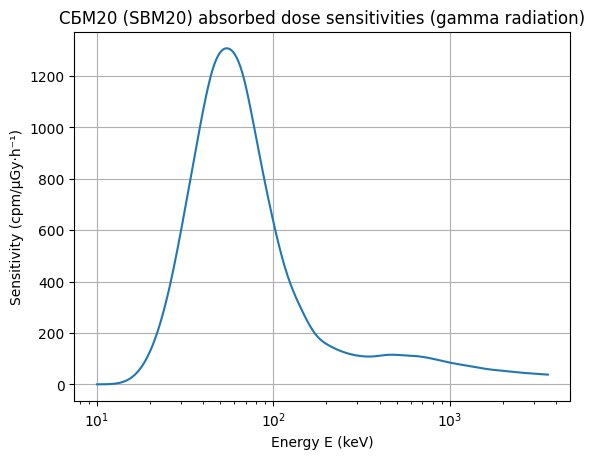

In [11]:
absorbed_dose_sensitivities = radlab.calculate_absorbed_dose_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} absorbed dose sensitivities (gamma radiation)',
                     energies, absorbed_dose_sensitivities, "Sensitivity (cpm/µGy·h⁻¹)")

## Effective dose sensitivity

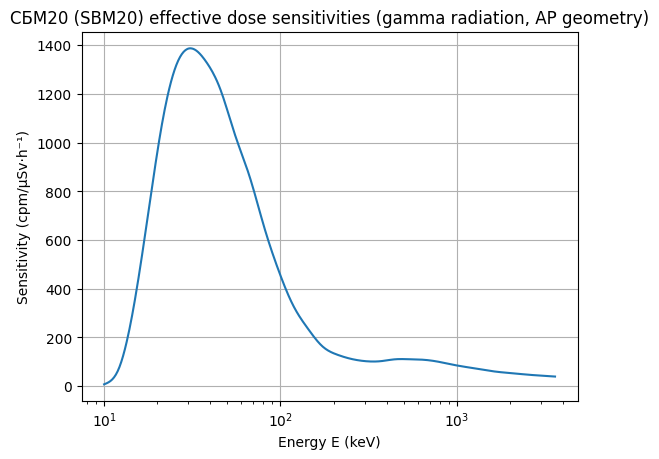

In [12]:
effective_dose_sensitivities = radlab.calculate_effective_dose_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} effective dose sensitivities (gamma radiation, AP geometry)',
                     energies, effective_dose_sensitivities, "Sensitivity (cpm/µSv·h⁻¹)")

## Angular response

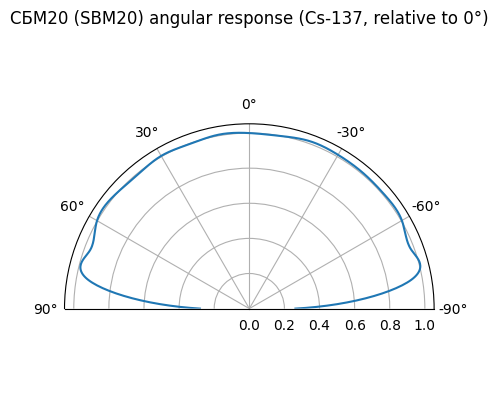

In [13]:
radlab.plot_polar(
    f'{detector_label} angular response (Cs-137, relative to 0°)', angles, angular_response)

## Sensitivity for various sources

In [14]:
source_sensitivities = radlab.calculate_source_sensitivities(
    energies, effective_dose_sensitivities)

radlab.print_source_sensitivities(source_sensitivities)

| Source | Sensitivity (cpm/µSv/h) | Relative sensitivity (Cs-137) |
|-|-|-|
| Cs-137 | 107.136 | 1.000 |
| Co-60 | 72.584 | 0.677 |
| I-131 | 104.588 | 0.976 |
| K-40 | 64.848 | 0.605 |
| Am-241 | 979.574 | 9.143 |
| Radium | 87.600 | 0.818 |
| Uranium ore | 98.936 | 0.923 |
| Uranium glaze | 110.626 | 1.033 |
| Depleted uranium | 109.868 | 1.026 |
| Thorium ore | 87.488 | 0.817 |
| X-ray tube (60 kV) | 1263.256 | 11.791 |
| Natural background | 124.622 | 1.163 |
